# FOODLAB PROJECT

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast

## I - Food.com Recipes

Nutrition information (calories (#), total fat (PDV), sugar (PDV) , sodium (PDV) , protein (PDV) , saturated fat)

In [36]:
recipes = pd.read_csv("../02 - Data/Recipes/RAW_recipes.csv")
recipes['ingredients'] = recipes['ingredients'].apply(ast.literal_eval)
recipes_clean = recipes[['name', 'id', 'minutes', 'tags', 'nutrition', 'n_steps', 'ingredients']]
recipes_clean
recipes_clean.head()

,name,id,minutes,tags,nutrition,n_steps,ingredients
0,arriba baked winter squash mexican style,137739,55,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"[winter squash, mexican seasoning, mixed spice..."
1,a bit different breakfast pizza,31490,30,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"[prepared pizza crust, sausage patty, eggs, mi..."
2,all in the kitchen chili,112140,130,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"[ground beef, yellow onions, diced tomatoes, t..."
3,alouette potatoes,59389,45,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,"[spreadable cheese with garlic and herbs, new ..."
4,amish tomato ketchup for canning,44061,190,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,"[tomato juice, apple cider vinegar, sugar, sal..."


In [4]:
recipes_clean.to_csv('recipes_clean.csv', index=False)

In [37]:
filtered_recipes = recipes_clean[recipes_clean['tags'].apply(lambda tags: 'main-dish' in tags)]
filtered_recipes.head()

,name,id,minutes,tags,nutrition,n_steps,ingredients
1,a bit different breakfast pizza,31490,30,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"[prepared pizza crust, sausage patty, eggs, mi..."
2,all in the kitchen chili,112140,130,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"[ground beef, yellow onions, diced tomatoes, t..."
7,backyard style barbecued ribs,67888,120,"['weeknight', 'time-to-make', 'course', 'main-...","[1109.5, 83.0, 378.0, 275.0, 96.0, 86.0, 36.0]",10,"[pork spareribs, soy sauce, fresh garlic, fres..."
15,chicken lickin good pork chops,63986,500,"['weeknight', 'time-to-make', 'course', 'main-...","[105.7, 8.0, 0.0, 26.0, 5.0, 4.0, 3.0]",5,"[lean pork chops, flour, salt, dry mustard, ga..."
18,chinese chop suey,8559,70,"['weeknight', 'time-to-make', 'course', 'main-...","[395.4, 31.0, 20.0, 29.0, 51.0, 33.0, 8.0]",8,"[celery, onion, ground pork, soy sauce, beef b..."


In [41]:
unique_ingredients = set()

# Iterate over each row in the 'ingredients' column and add ingredients to the set
for ingredients_list in filtered_recipes['ingredients']:
    unique_ingredients.update(ingredients_list)

unique_ingredients_list = sorted(list(unique_ingredients))

print(unique_ingredients_list)

['1% fat buttermilk', '1% fat cottage cheese', '1% low-fat milk', '10 inch low-fat flour tortillas', '10% cream', '10-inch flour tortilla', '10-inch flour tortillas', '10-inch pie shell', '10-inch sun-dried tomato tortillas', '10-minute herb stuffing mix', '10-minute success rice', '12-inch flour tortillas', '12-inch pizza crust', '12-inch tortilla', '15 bean mix', '15 bean soup mix', '15 inch pizza crusts', '15% cream', '18% table cream', '2% cheddar cheese', '2% evaporated milk', '2% fat cottage cheese', '2% low-fat milk', '2% mexican cheese blend', '2% milk', '2% mozzarella cheese', '3 bean mix', '3-cheese gourmet cheddar blend cheese', '35% cream', '5% fat ricotta cheese', '6-inch corn tortillas', '6-inch flour tortillas', '6-inch pitas', '6-inch tortillas', '6-inch whole wheat pitas', '7 bean mix', '7-inch flour tortillas', '7-up', '7-up soda', '70% lean ground beef', '8 inch pie shell', '8-grain bread', '8-inch 97% fat free flour tortillas', '8-inch fat-free flour tortillas', '8-

## II - Allrecipes Data

In [52]:
allrec = pd.read_csv('../scraped-07-05-21.csv')

In [7]:
allrec.columns

Index(['name', 'url', 'category', 'author', 'summary', 'rating',
       'rating_count', 'review_count', 'ingredients', 'directions', 'prep',
       'cook', 'total', 'servings', 'yield', 'calories', 'carbohydrates_g',
       'sugars_g', 'fat_g', 'saturated_fat_g', 'cholesterol_mg', 'protein_g',
       'dietary_fiber_g', 'sodium_mg', 'calories_from_fat', 'calcium_mg',
       'iron_mg', 'magnesium_mg', 'potassium_mg', 'zinc_mg', 'phosphorus_mg',
       'vitamin_a_iu_IU', 'niacin_equivalents_mg', 'vitamin_b6_mg',
       'vitamin_c_mg', 'folate_mcg', 'thiamin_mg', 'riboflavin_mg',
       'vitamin_e_iu_IU', 'vitamin_k_mcg', 'biotin_mcg', 'vitamin_b12_mcg',
       'mono_fat_g', 'poly_fat_g', 'trans_fatty_acid_g',
       'omega_3_fatty_acid_g', 'omega_6_fatty_acid_g'],
      dtype='object')

In [67]:
import pandas as pd
import re

# Sample DataFrame for demonstration purposes
data = {
    'ingredients': ['1 (8 ounce) box elbow macaroni ; ¼ cup butter', '6 cups chicken broth, divided ; 3 tablespoons olive oil']
}

allrec = pd.DataFrame(data)

def clean_ingredients(ingredient):
    # Define patterns to match volume information
    volume_patterns = ['ounce', 'box', 'cup', 'cups', 'tablespoon']
    
    # Iterate through volume patterns and remove them from the ingredient
    for pattern in volume_patterns:
        ingredient = re.sub(r'\b\d+\s*' + pattern + r'\b', '', ingredient)
    
    return ingredient.strip()

allrec['cleaned_ingredient'] = allrec['ingredients'].apply(clean_ingredients)
print(allrec['cleaned_ingredient'])

0              1 () box elbow macaroni ; ¼ cup butter
1    chicken broth, divided ; 3 tablespoons olive oil
Name: cleaned_ingredient, dtype: object


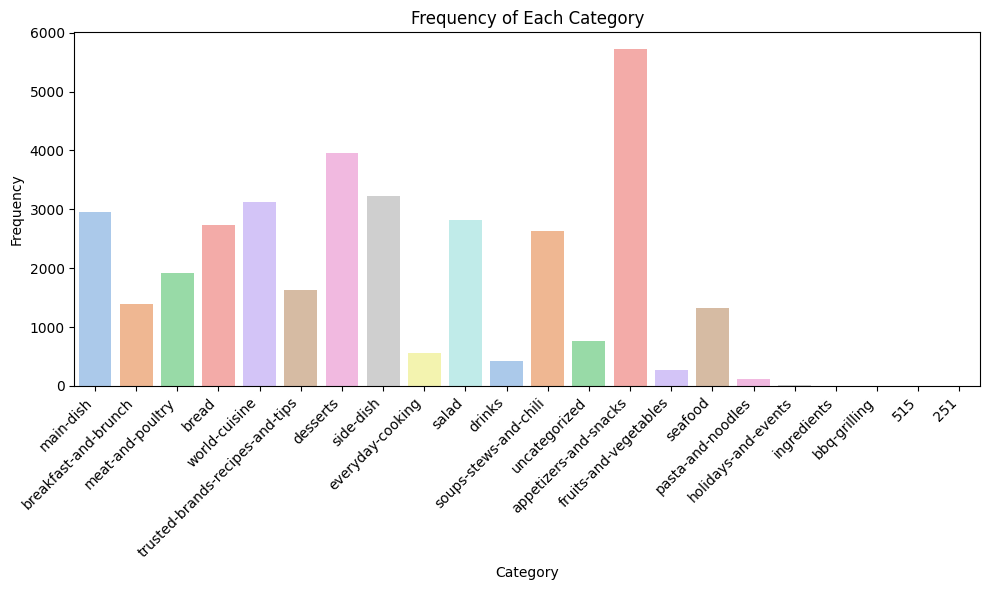

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(data=allrec, x='category', palette='pastel')
plt.title('Frequency of Each Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## III - Recipe 1M+

In [4]:
file_path = '../recipes_with_nutritional_info.json'

# Read the JSON file into a DataFrame
df = pd.read_json(file_path)

In [7]:
df.head()

,fsa_lights_per100g,id,ingredients,instructions,nutr_per_ingredient,nutr_values_per100g,partition,quantity,title,unit,url,weight_per_ingr
0,"{'fat': 'green', 'salt': 'green', 'saturates':...",000095fc1d,"[{'text': 'yogurt, greek, plain, nonfat'}, {'t...",[{'text': 'Layer all ingredients in a serving ...,"[{'fat': 0.8845044000000001, 'nrg': 133.80964,...","{'energy': 81.12946131894766, 'fat': 2.1401392...",train,"[{'text': '8'}, {'text': '1'}, {'text': '1/4'}]",Yogurt Parfaits,"[{'text': 'ounce'}, {'text': 'cup'}, {'text': ...",http://tastykitchen.com/recipes/breakfastbrunc...,"[226.796, 152.0, 30.5]"
1,"{'fat': 'red', 'salt': 'orange', 'saturates': ...",00051d5b9d,"[{'text': 'sugars, granulated'}, {'text': 'oil...",[{'text': 'Cream sugar and butter together til...,"[{'fat': 0.0, 'nrg': 384.0, 'pro': 0.0, 'sat':...","{'energy': 477.09640393594606, 'fat': 23.41248...",val,"[{'text': '1/2'}, {'text': '3/4'}, {'text': '1...","Salt Free, Low Cholesterol Sugar Cookies Recipe","[{'text': 'cup'}, {'text': 'cup'}, {'text': 'c...",http://cookeatshare.com/recipes/salt-free-low-...,"[100.80000000000001, 168.0, 21.25, 5.166666666..."
2,"{'fat': 'orange', 'salt': 'orange', 'saturates...",00059b093b,"[{'text': 'chicken, broilers or fryers, wing, ...","[{'text': 'Preheat oven to 400 degrees F.'}, {...","[{'fat': 174.859716, 'nrg': 2599.0821599999995...","{'energy': 208.05898280960727, 'fat': 14.29704...",train,"[{'text': '3'}, {'text': '1'}, {'text': '1/2'}...",Honey Sriracha Chicken Wings,"[{'text': 'pound'}, {'text': 'teaspoon'}, {'te...",http://tastykitchen.com/recipes/main-courses/h...,"[1360.7759999999998, 6.0, 1.15, 13.5, 42.59999..."
3,"{'fat': 'orange', 'salt': 'orange', 'saturates...",0005fc89f7,"[{'text': 'crustaceans, shrimp, raw (not previ...","[{'text': 'In a large bowl, toss the shrimp, g...","[{'fat': 4.6266384, 'nrg': 771.1064, 'pro': 18...","{'energy': 194.7525956849092, 'fat': 15.980767...",train,"[{'text': '2'}, {'text': '3/4'}, {'text': '1 1...",Shrimp and Caper Salad,"[{'text': 'pound'}, {'text': 'cup'}, {'text': ...",http://allrecipes.com/recipe/shrimp-and-caper-...,"[907.184, 75.0, 151.5, 25.799999999999997, 134..."
4,"{'fat': 'orange', 'salt': 'green', 'saturates'...",0006ca31f4,"[{'text': 'cocoa, dry powder, unsweetened'}, {...",[{'text': 'Measure out the cocoa powder into a...,"[{'fat': 141.35999999999999, 'nrg': 2352.0, 'p...","{'energy': 303.43539955190437, 'fat': 5.094846...",train,"[{'text': '12'}, {'text': '12'}, {'text': '1'}]",Natural Peanut Butter Chocolate Bon Bons,"[{'text': 'cup'}, {'text': 'cup'}, {'text': 'c...",http://www.food.com/recipe/natural-peanut-butt...,"[1032.0, 4068.0, 256.0]"


In [8]:
unique_keys = set()

for index, row in df.iterrows():
    for nutrient in row['nutr_per_ingredient']:
        unique_keys.update(nutrient.keys())

print("Unique keys in 'nutr_per_ingredient':", unique_keys)

Unique keys in 'nutr_per_ingredient': {'pro', 'sat', 'sod', 'sug', 'nrg', 'fat'}


## IV - Compute Recipe Score

In [53]:
def score_energy_kj(energy):
    if energy <= 335:
        return 0
    elif energy <= 670:
        return 1
    elif energy <= 1005:
        return 2
    elif energy <= 1340:
        return 3
    elif energy <= 1675:
        return 4
    elif energy <= 2010:
        return 5
    elif energy <= 2345:
        return 6
    elif energy <= 2680:
        return 7
    elif energy <= 3015:
        return 8
    elif energy <= 3350:
        return 9
    else:
        return 10

def score_saturated_fat(fat):
    if fat <= 1:
        return 0
    elif fat <= 2:
        return 1
    elif fat <= 3:
        return 2
    elif fat <= 4:
        return 3
    elif fat <= 5:
        return 4
    elif fat <= 6:
        return 5
    elif fat <= 7:
        return 6
    elif fat <= 8:
        return 7
    elif fat <= 9:
        return 8
    elif fat <= 10:
        return 9
    else:
        return 10

def score_sugar(sugar):
    if sugar <= 4.5:
        return 0
    elif sugar <= 9:
        return 1
    elif sugar <= 13.5:
        return 2
    elif sugar <= 18:
        return 3
    elif sugar <= 22.5:
        return 4
    elif sugar <= 27:
        return 5
    elif sugar <= 31:
        return 6
    elif sugar <= 36:
        return 7
    elif sugar <= 40:
        return 8
    elif sugar <= 45:
        return 9
    else:
        return 10

def score_sodium(sodium):
    if sodium <= 90:
        return 0
    elif sodium <= 180:
        return 1
    elif sodium <= 270:
        return 2
    elif sodium <= 360:
        return 3
    elif sodium <= 450:
        return 4
    elif sodium <= 540:
        return 5
    elif sodium <= 630:
        return 6
    elif sodium <= 720:
        return 7
    elif sodium <= 810:
        return 8
    elif sodium <= 900:
        return 9
    else:
        return 10

# Define the scoring function for positive nutrients
def score_protein(protein):
    if protein <= 1.6:
        return 0
    elif protein <= 3.2:
        return 1
    elif protein <= 4.8:
        return 2
    elif protein <= 6.4:
        return 3
    elif protein <= 8.0:
        return 4
    else:
        return 5

def score_fiber(fiber):
    if fiber <= 0.9:
        return 0
    elif fiber <= 1.9:
        return 1
    elif fiber <= 2.8:
        return 2
    elif fiber <= 3.7:
        return 3
    elif fiber <= 4.7:
        return 4
    else:
        return 5

def score_fvnl(fvnl):
    if fvnl <= 40:
        return 0
    elif fvnl <= 60:
        return 1
    elif fvnl <= 80:
        return 2
    elif fvnl <= 100:
        return 5
    else:
        return 0


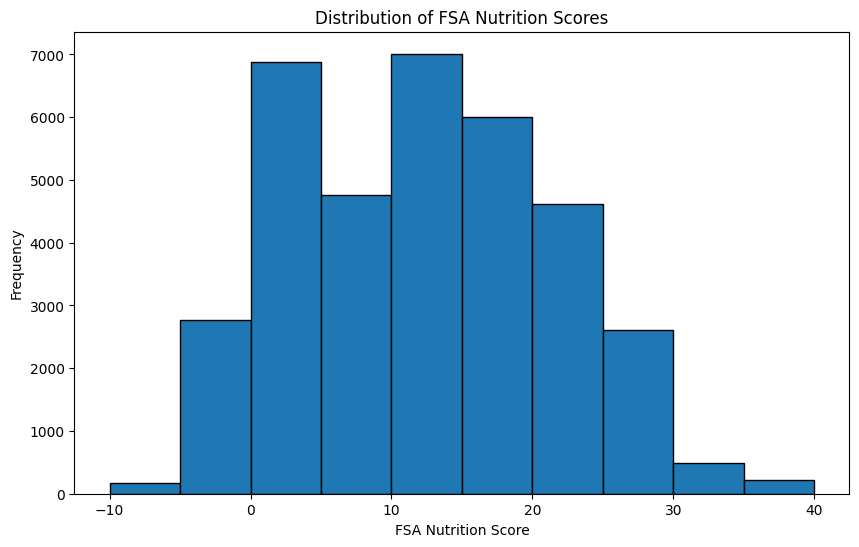

                             name  fsa_score
0      Simple Macaroni and Cheese         24
1        Gourmet Mushroom Risotto         19
2                  Dessert Crepes          5
3                     Pork Steaks         20
4      Quick and Easy Pizza Crust          2
...                           ...        ...
35511          Spicy Deviled Eggs          0
35512                  Nori Chips          5
35513  Deep Fried Jalapeno Slices          7
35514             Jalapeno Hummus         -1
35515   Easy Baked Zucchini Chips          1

[35516 rows x 2 columns]


In [54]:
# Apply the scoring functions to each nutrient
allrec['energy_kj'] = allrec['calories'] * 4.184
allrec['energy_score'] = allrec['energy_kj'].apply(score_energy_kj)
allrec['saturated_fat_score'] = allrec['saturated_fat_g'].apply(score_saturated_fat)
allrec['sugar_score'] = allrec['sugars_g'].apply(score_sugar)
allrec['sodium_score'] = allrec['sodium_mg'].apply(score_sodium)
allrec['protein_score'] = allrec['protein_g'].apply(score_protein)
allrec['fiber_score'] = allrec['dietary_fiber_g'].apply(score_fiber)

# Compute total negative and positive scores
allrec['A_points'] = (allrec['energy_score'] + allrec['saturated_fat_score'] +
                  allrec['sugar_score'] + allrec['sodium_score'])
allrec['C_points'] = (allrec['protein_score'] + allrec['fiber_score'])

# Calculate the final FSA score
allrec['fsa_score'] = allrec.apply(lambda row: row['A_points'] - 
                           (row['fiber_score']) if row['A_points'] >= 11 
                           else row['A_points'] - row['C_points'], axis=1)

# Plot the histogram of the FSA score
plt.figure(figsize=(10, 6))
plt.hist(allrec['fsa_score'], bins=10, edgecolor='black')
plt.title('Distribution of FSA Nutrition Scores')
plt.xlabel('FSA Nutrition Score')
plt.ylabel('Frequency')
plt.show()

print(allrec[['name', 'fsa_score']])

In [56]:
allrec['category'].unique()

array(['main-dish', 'breakfast-and-brunch', 'meat-and-poultry', 'bread',
       'world-cuisine', 'trusted-brands-recipes-and-tips', 'desserts',
       'side-dish', 'everyday-cooking', 'salad', 'drinks',
       'soups-stews-and-chili', 'uncategorized', 'appetizers-and-snacks',
       'fruits-and-vegetables', 'seafood', 'pasta-and-noodles',
       'holidays-and-events', 'ingredients', 'bbq-grilling', '515', '251'],
      dtype=object)

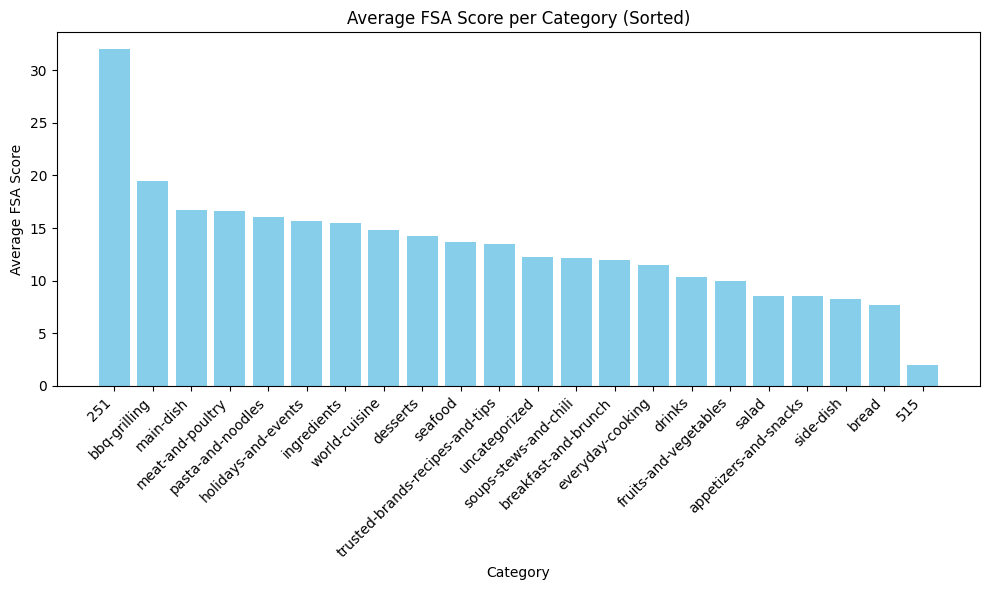

In [61]:
average_scores = allrec.groupby('category')['fsa_score'].mean().reset_index()

# Sort the DataFrame by average FSA score
average_scores_sorted = average_scores.sort_values(by='fsa_score', ascending=False)

# Plotting the sorted bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_scores_sorted['category'], average_scores_sorted['fsa_score'], color='skyblue')
plt.title('Average FSA Score per Category (Sorted)')
plt.xlabel('Category')
plt.ylabel('Average FSA Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [60]:
allrec[allrec['category']=='515']

,name,url,category,author,summary,rating,rating_count,review_count,ingredients,directions,...,energy_kj,energy_score,saturated_fat_score,sugar_score,sodium_score,protein_score,fiber_score,A_points,C_points,fsa_score
24509,Homemade Ramp Mayonnaise,https://www.allrecipes.com/recipe/283502/homem...,515,nch,This garlicky mayonnaise is delicious with col...,0.0,0,0,1 large egg ; 2 large egg yolks ; 1 teaspoon D...,Combine egg and egg yolk in a food processor a...,...,1305.408,3,5,0,0,1,5,8,6,2
